In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [21]:
smsdf =  pd.read_csv('./datasets/sms_spamham.csv',encoding='latin1')
smsdf = smsdf[['v1','v2']]
smsdf['res'] = smsdf['v1'].map({'ham':0,'spam':1})
smsdf = smsdf.rename(columns={'v1':'dummy','v2':'text','res':'spamham'})
smsdf.drop('dummy',inplace=True,axis=1)
smsdf.head()

,text,spamham
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [22]:
emaildf =  pd.read_csv('./datasets/email_spamham.csv',encoding='latin1')
emaildf.drop(['Unnamed: 0','label'],inplace=True,axis=1)
emaildf = emaildf.rename(columns={'text':'text','label_num':'spamham'})
emaildf.head()

,text,spamham
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [23]:
df = pd.concat([emaildf,smsdf])
df = df.sample(frac=1)
df.head()

,text,spamham
2109,Subject: central power & light\r\ndaren - was ...,0
2143,Subject: italian rolex in throw away prices . ...,1
2219,Subject: wellhead deals changed\r\ndaren / o '...,0
4278,Subject: lacy\r\nhey - - just thought i ' d le...,0
5211,It is only yesterday true true.,0


In [24]:
df.isna().sum() #no NA values

text       0
spamham    0
dtype: int64

In [26]:
df.duplicated().sum()

581

In [27]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [28]:
x,y=df['text'],df['spamham']
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size=0.2)

In [33]:
vectorizer = CountVectorizer()
X_train_countvec = vectorizer.fit_transform(X_train)

In [37]:
classifier = MultinomialNB()
classifier.fit(X_train_countvec,Y_train)

MultinomialNB()

In [41]:
x_test_countvec = vectorizer.transform(x_test)

In [42]:
y_pred = classifier.predict(x_test_countvec)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1558
           1       0.88      0.94      0.91       475

    accuracy                           0.96      2033
   macro avg       0.93      0.95      0.94      2033
weighted avg       0.96      0.96      0.96      2033



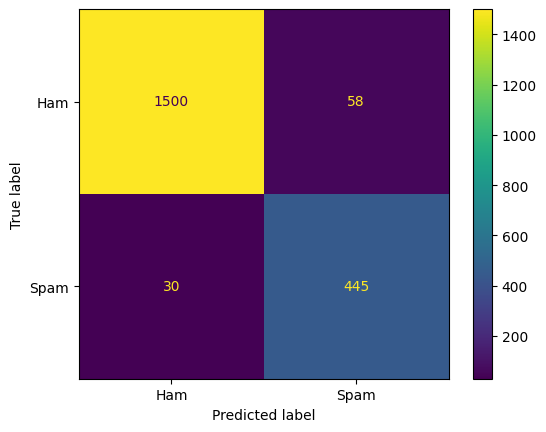

In [53]:
confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Ham", "Spam"])
cm_display.plot()